**Import Libraries**

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for better chart styles
sns.set(style="whitegrid")


**Load the Dataset**

In [2]:
# Load the dataset from the CSV file
data = pd.read_csv('retail_sales_data.csv')

# Show the first 5 rows of the data
data.head()


,Order ID,Product Category,Sales Amount,Order Date,Region,Customer Name
0,101,Electronics,250,1/5/2024,North,John
1,102,Furniture,450,1/7/2024,South,Alice
2,103,Clothing,150,1/10/2024,East,Bob
3,104,Electronics,300,1/12/2024,West,Eve
4,105,Furniture,500,1/15/2024,North,Mike


**Check Basic Information**

In [3]:
# Check the data types and missing values
data.info()

# Show some basic statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          10 non-null     int64 
 1   Product Category  10 non-null     object
 2   Sales Amount      10 non-null     int64 
 3   Order Date        10 non-null     object
 4   Region            10 non-null     object
 5   Customer Name     10 non-null     object
dtypes: int64(2), object(4)
memory usage: 612.0+ bytes


,Order ID,Sales Amount
count,10.00000,10.000000
mean,105.50000,333.000000
std,3.02765,139.845152
min,101.00000,150.000000
25%,103.25000,212.500000
50%,105.50000,325.000000
75%,107.75000,437.500000
max,110.00000,550.000000


**Data Cleaning**

In [4]:
# Check for missing values
print("Missing values in each column:\n")
print(data.isnull().sum())

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Missing values in each column:

Order ID            0
Product Category    0
Sales Amount        0
Order Date          0
Region              0
Customer Name       0
dtype: int64

Number of duplicate rows: 0


**Sales Trend Analysis (Over Time)**

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


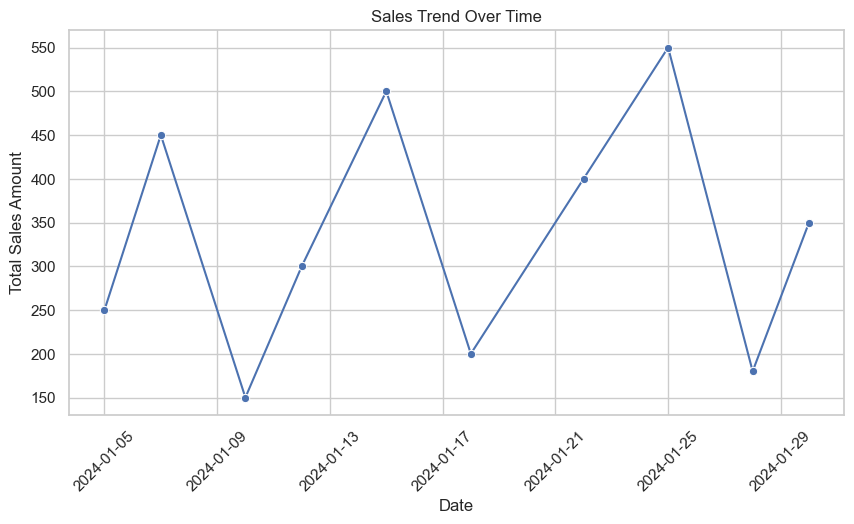

In [5]:
# Convert 'Order Date' column to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Group sales by Order Date
sales_trend = data.groupby('Order Date')['Sales Amount'].sum().reset_index()

# Plot the sales trend
plt.figure(figsize=(10,5))
sns.lineplot(data=sales_trend, x='Order Date', y='Sales Amount', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


**Top-Performing Product Categories**

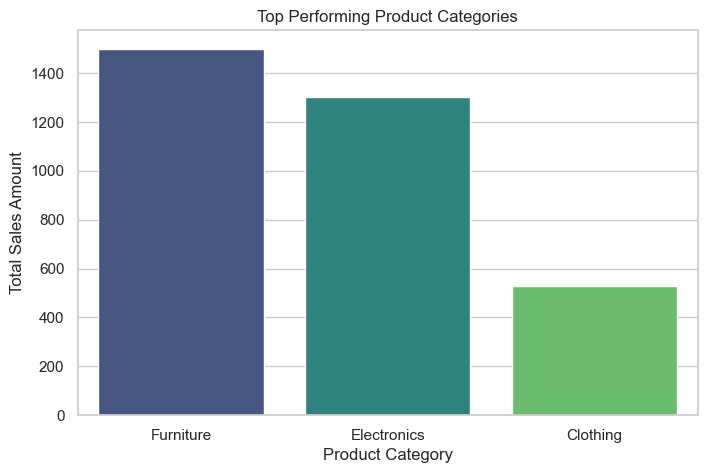

In [6]:
# Group sales by Product Category
top_products = data.groupby('Product Category')['Sales Amount'].sum().sort_values(ascending=False)

# Plot the top-performing product categories
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top Performing Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()


**Regional Sales Performance**

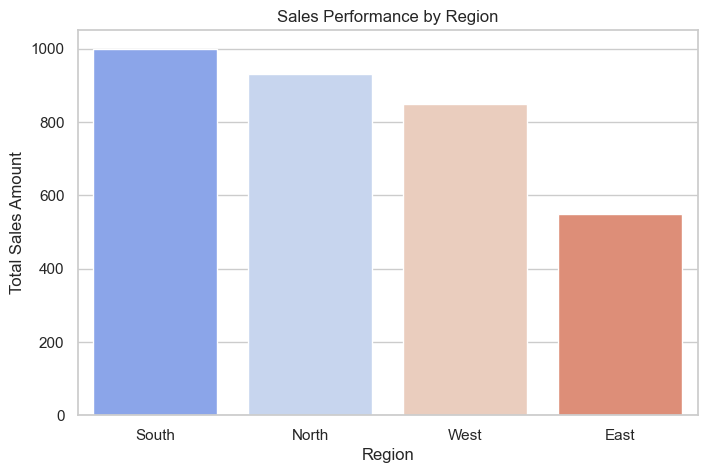

In [7]:
# Group sales by Region
regional_sales = data.groupby('Region')['Sales Amount'].sum().sort_values(ascending=False)

# Plot regional sales
plt.figure(figsize=(8,5))
sns.barplot(x=regional_sales.index, y=regional_sales.values, palette='coolwarm')
plt.title('Sales Performance by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.show()
